Nous sommes maintenant armé.e.s pour implémenter en langage Python l'entrainement d'un modèle de type régression logistique à diagnostiquer l'absence ou la présence d'un cancer du sein. Pour cela, nous allons construire un Jupyter Notebook selon le plan suivant :
- Importation des librairies Python nécessaires à la résolution du problème
- Chargement des données du Breast Cancer Wisconsin (diagnostic) Dataset
- Mise au format Numpy des données :
  NB Par défaut, ce jeu de données représente les patients malades par la valeur 0 et les patients sains par la valeur 1, ce qui est l'inverse de 
  ce qui se fait traditionnellement en santé. Nous devons donc relabelliser les patients sains par la valeur 0 et les patients malades par la 
  valeur 1
- Echantillonnage des données :
  NB test_size = 113
- Afficher sous forme d'histogrammes la distribution du jeu de données initial, du jeu de train et du jeu de test en fonction de chaque catégorie (bénigne et maline)
- Effectuer le Feature Scaling
- Entrainer le modèle de régression logistique :
  NB model = LogisticRegression(C = 0.1, max_iter = 10000)- Calculer et afficher les performances obtenues sur le jeu d'apprentissage
  Matrice de confusion  
Taux de classification, Rappel, Précision et F1-Score  
Courbe ROC, A
- Calculer et afficher les performances obtenues sur le jeu de test :
  Matrice de confusion  
Taux de classification, Rappel, Précision et F1-Score  
Courbe ROC, AUCUC
   


re
Courbe ROC, AUC

### Importation des librairies Python nécessaires à la résolution du problème


In [1]:
import sklearn as sk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Chargement des données du Breast Cancer Wisconsin (diagnostic) Dataset

In [2]:
# Chargement des données
data = pd.read_csv('data.csv')
# Afficher toutes les colonnes 
pd.set_option('display.max_columns', None)
# Afficher toutes les lignes 
pd.set_option('display.max_rows', None)
# Définir la largeur d'affichage maximale
pd.set_option('display.max_colwidth', None)

### Nettoyage

In [3]:
# Récupérer les infos sur les colonnes et leurs entrées
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Récupération des statistiques générales du Dataframe
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
# Recherche de valeurs nulls
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
# Recherche de valeurs manquantes
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
# Suppresion de colonne non exploitable
data = data.drop(columns='Unnamed: 32')

### Normalisation

In [8]:
# Analyse des valeurs de la colonne diagnosis :
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [9]:
# Convertir famhist en booléen : 
# Utilisation du mapping pour attribuer les booléens : 
data_diagnosis = {'M': True, 'B': False}
# Appliquer la transformation
data['diagnosis'] = data['diagnosis'].replace(data_diagnosis).astype(int)

### Analyse univariée

In [10]:
# Create a figure and axis objects for subplots
#fig, axs = plt.subplots(5, 6, figsize=(19, 10))

#axs = axs.flatten()

# Iterate over the features and create scatter subplots
#for i, feature in enumerate(data.columns):
    #print(i,feature)
#    sns.scatterplot(data=data, x=feature, y='diagnosis', ax=axs[i])
    #axs[i].set_title(feature)

### Analyse multivariée

In [11]:
# Matrice de corrélation
#correlation_matrix = data.corr()
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
#plt.title('Matrice de corrélation')
#plt.show()

In [12]:
# Identifier la corrélations des variables avec la valeur reel avec la méthode Anova (quali/quanti)

#import pandas as pd
#from scipy.stats import f_oneway

#valeurs_a_tester_quanti = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
#       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
#       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
#       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
#       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
#       'fractal_dimension_se', 'radius_worst', 'texture_worst',
#       'perimeter_worst', 'area_worst', 'smoothness_worst',
#       'compactness_worst', 'concavity_worst', 'concave points_worst',
#       'symmetry_worst', 'fractal_dimension_worst']

# Création d'une liste pour stocker les résultats
#resultats_ordonnes = []

# Application de l'ANOVA pour chaque élément de la liste
#for colonne in valeurs_a_tester_quanti:
    # Création d'une liste pour stocker les groupes de scores
#    resultats = []
    
    # Groupement par la colonne en cours
#    for group, scores in data.groupby(colonne)['diagnosis']:
        # Vérification si le groupe contient au moins deux échantillons
#        if len(scores) >= 2:
#            resultats.append(scores)
    
    # Vérification si au moins deux groupes sont présents
#    if len(resultats) >= 2:
        # Calcul de l'ANOVA
#        f_value, p_value = f_oneway(*resultats)
        
        # Ajout des résultats à la liste
#        resultats_ordonnes.append((colonne, f_value, p_value))

# Tri des résultats en fonction de la P-value (indice 2)
#resultats_ordonnes = sorted(resultats_ordonnes, key=lambda x: x[2])

# Affichage des résultats dans l'ordre croissant de la P-value
#for colonne, f_value, p_value in resultats_ordonnes:
#    print("Colonne :", colonne)
#    print("Valeur F :", f_value)
#    print("P-value :", "{:.10f}".format(p_value))
#    print()

### Split jeu de test, jeu d'entraînement

In [13]:
#from sklearn.model_selection import train_test_split
#from sklearn import metrics
#features = ['radius_worst', 'concave points_worst', 'perimeter_mean', 'concave points_mean', 'radius_mean', 'concavity_mean',
#'concavity_se', 'perimeter_se', 'perimeter_worst', 'concavity_worst', 'area_worst', 'area_mean', 'compactness_worst',
#'area_se', 'compactness_se', 'texture_mean']
#X = data[features]
#y = data['diagnosis']
# séparation du jeu
#X_train, X_test , y_train, y_test = train_test_split(X,y, train_size = 0.2)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
features = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
X = data[features]
y = data['diagnosis']
# séparation du jeu
X_train, X_test , y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state=0, stratify=y)
# Convertissez X_test en DataFrame si ce n'est pas déjà le cas
X_test = pd.DataFrame(X_test, columns=features)

### Histogramme

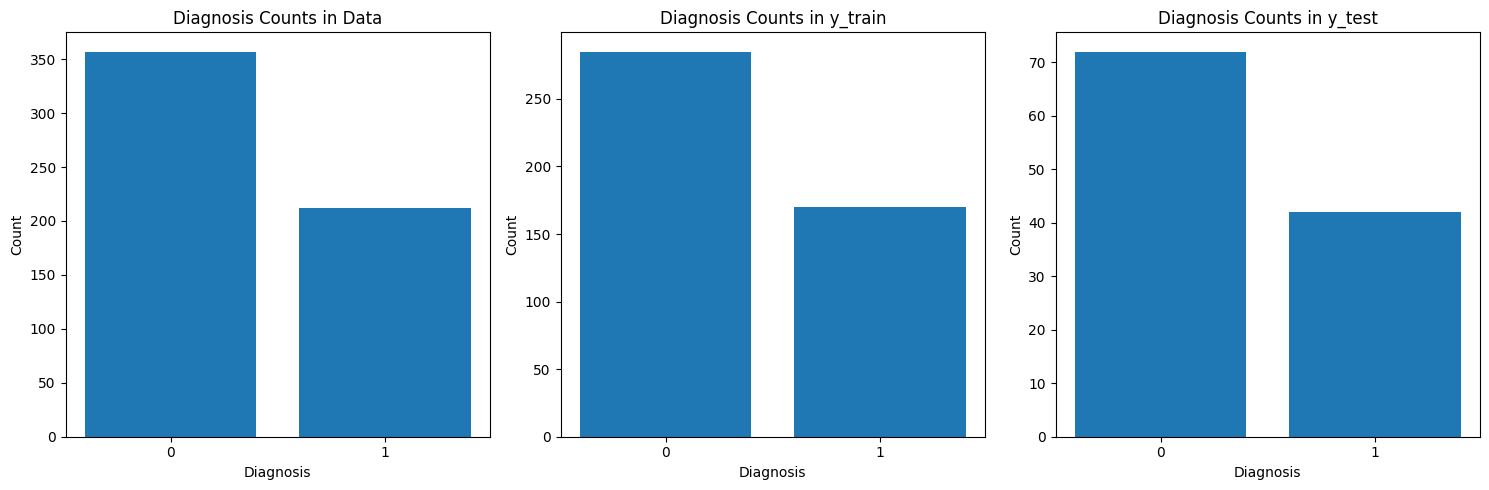

In [15]:
import matplotlib.pyplot as plt

# Créer une figure et une grille de sous-graphiques (1 ligne, 3 colonnes)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# -------------- Histogramme pour le jeu de données initial --------------
# Compter le nombre de 0 et de 1 dans la colonne 'diagnosis' du jeu de données initial 'data'
diagnosis_counts_data = data['diagnosis'].value_counts()

# Créer un histogramme pour le jeu de données initial
axs[0].bar(diagnosis_counts_data.index, diagnosis_counts_data.values)

# Définir les positions des valeurs de l'axe x et leurs étiquettes pour le sous-graphique 1
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['0', '1'])

# Ajouter des étiquettes pour le sous-graphique 1
axs[0].set_xlabel('Diagnosis')
axs[0].set_ylabel('Count')
axs[0].set_title('Diagnosis Counts in Data')

# -------------- Histogramme pour y_train --------------
# Compter le nombre de 0 et de 1 dans y_train
train_diagnosis_counts = y_train.value_counts()

# Créer un histogramme pour y_train
axs[1].bar(train_diagnosis_counts.index, train_diagnosis_counts.values)

# Définir les positions des valeurs de l'axe x et leurs étiquettes pour le sous-graphique 2
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(['0', '1'])

# Ajouter des étiquettes pour le sous-graphique 2
axs[1].set_xlabel('Diagnosis')
axs[1].set_ylabel('Count')
axs[1].set_title('Diagnosis Counts in y_train')

# -------------- Histogramme pour y_test --------------
# Compter le nombre de 0 et de 1 dans y_test
test_diagnosis_counts = y_test.value_counts()

# Créer un histogramme pour y_test
axs[2].bar(test_diagnosis_counts.index, test_diagnosis_counts.values)

# Définir les positions des valeurs de l'axe x et leurs étiquettes pour le sous-graphique 3
axs[2].set_xticks([0, 1])
axs[2].set_xticklabels(['0', '1'])

# Ajouter des étiquettes pour le sous-graphique 3
axs[2].set_xlabel('Diagnosis')
axs[2].set_ylabel('Count')
axs[2].set_title('Diagnosis Counts in y_test')

# Ajuster l'espace entre les sous-graphiques pour éviter le chevauchement des étiquettes
plt.tight_layout()

# Afficher le tableau des histogrammes
plt.show()


### Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Jeu d'entrainement

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C = 0.1, max_iter = 10000)
model.fit(scaled_X_train, y_train)
y_pred = model.predict(scaled_X_train)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,

In [18]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,roc_curve, roc_auc_score
cm2 = confusion_matrix(y_train, y_pred)
print(cm2)

[[284   1]
 [  5 165]]


<Axes: >

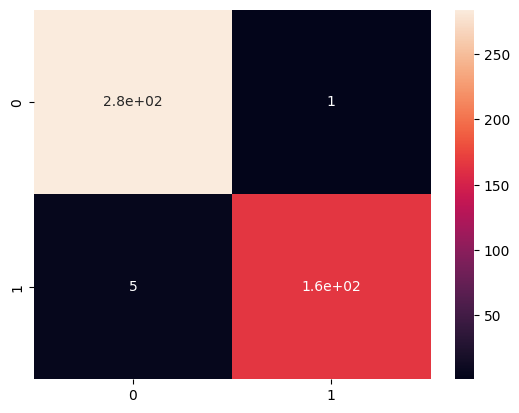

In [19]:
sns.heatmap(cm2, annot=True)

In [20]:
from sklearn.metrics import classification_report

cr2 = classification_report(y_train, y_pred) #Precision, Recall, F1-score avec le modèle de plus proches voisins

print(cr2)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       285
           1       0.99      0.97      0.98       170

    accuracy                           0.99       455
   macro avg       0.99      0.98      0.99       455
weighted avg       0.99      0.99      0.99       455



In [21]:
y_score2 = model.predict_proba(scaled_X_train)[:,1]
fpr2, tpr2, threshold2 = roc_curve(y_train, y_score2)
print('roc_auc_score: ', roc_auc_score(y_train, y_score2))

roc_auc_score:  0.9964912280701754


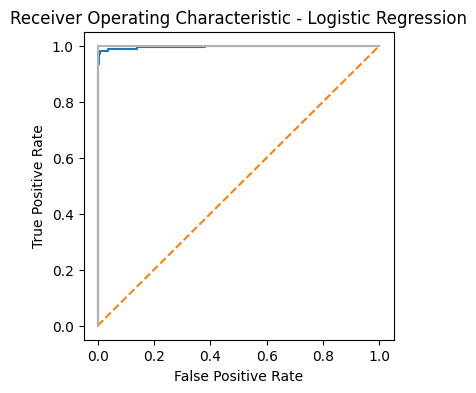

In [22]:
plt.subplots(1, figsize=(4,4))
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(fpr2, tpr2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Jeu de test

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C = 0.1, max_iter = 10000)
model.fit(scaled_X_train, y_train)
y_pred = model.predict(scaled_X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,roc_curve, roc_auc_score
cm2 = confusion_matrix(y_test, y_pred)
print(cm2)

In [ ]:
sns.heatmap(cm2, annot=True)

In [ ]:
from sklearn.metrics import classification_report

cr2 = classification_report(y_test, y_pred) #Precision, Recall, F1-score avec le modèle de plus proches voisins

print(cr2)

In [ ]:
y_score2 = model.predict_proba(scaled_X_test)[:,1]
fpr2, tpr2, threshold2 = roc_curve(y_test, y_score2)
print('roc_auc_score: ', roc_auc_score(y_test, y_score2))

In [ ]:
plt.subplots(1, figsize=(4,4))
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(fpr2, tpr2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()